In [15]:
import pandas as pd
import requests
import zipfile
import io
import matplotlib.pyplot as plt

In [2]:
url = "https://github.com/danielbanafshei01/MN5813/raw/main/online_retail.csv.zip"

zipfile = zipfile.ZipFile(io.BytesIO(requests.get(url).content))
df = pd.read_csv(zipfile.open
                 (zipfile.namelist()[0]))

df.head()
#The data set of customer preference is loaded in and the first 5 rows are displayed


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.isnull().any()
# Displays the columns in our data set and to check if there are any NAN values in any columns 


InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [4]:
print('Number of duplicated data:')
df.duplicated().sum()
#Checks for duplicated data and returns how many duplicates there are

Number of duplicated data:


5268

In [5]:
df['Description']=df['Description'].fillna('Product Unknown')
df['CustomerID']= df['CustomerID'].fillna(0)
#Nan values in categories have been replaced with placeholders
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce').dt.date
#time of invoice date removed


In [6]:
df.loc[df['StockCode'] == '85123A', 'Description'].unique()


array(['WHITE HANGING HEART T-LIGHT HOLDER', '?',
       'wrongly marked carton 22804',
       'CREAM HANGING HEART T-LIGHT HOLDER'], dtype=object)

Descriptions are messy, the next logical step to clean description is by matching it with the most frequent stock code 

In [7]:
sorted_descriptions = (
    df.groupby(['StockCode', 'Description'])
      .size()
      .reset_index(name='count')
      .sort_values(['StockCode', 'count'], ascending=[True, False])
      .drop_duplicates(subset=['StockCode'])
      .set_index('StockCode')['Description']
)

df['Description'] = df['StockCode'].map(
    sorted_descriptions.to_dict())






In [8]:
df.loc[df['StockCode'] == '85123A', 'Description'].unique()
#check to see if code worked

array(['WHITE HANGING HEART T-LIGHT HOLDER'], dtype=object)

In [9]:
df=df.drop_duplicates()
#duplicates are dropped 

In [10]:
stock_code = df['StockCode'].value_counts()
stock_code= stock_code.head(20).sort_values(ascending=False)
top_20_df = stock_code.reset_index()
top_20_df.columns = ['StockCode', 'Amount']
top_20_df['Description'] = top_20_df['StockCode'].map(sorted_descriptions)
top_20_df
#This shows the top 20 most sold products per transaction 

,StockCode,Amount,Description
0,85123A,2301,WHITE HANGING HEART T-LIGHT HOLDER
1,22423,2192,REGENCY CAKESTAND 3 TIER
2,85099B,2156,JUMBO BAG RED RETROSPOT
3,47566,1720,PARTY BUNTING
4,20725,1626,LUNCH BAG RED RETROSPOT
5,84879,1489,ASSORTED COLOUR BIRD ORNAMENT
6,22720,1469,SET OF 3 CAKE TINS PANTRY DESIGN
7,22197,1468,POPCORN HOLDER
8,21212,1367,PACK OF 72 RETROSPOT CAKE CASES
9,22383,1328,LUNCH BAG SUKI DESIGN


In [11]:
most_sold_df = (
    df.groupby('StockCode', as_index=False)
      .agg(TotalQuantity=('Quantity', 'sum'))
      .sort_values('TotalQuantity', ascending=False)
      .head(20)
)

most_sold_df['Description'] = most_sold_df['StockCode'].map(sorted_descriptions)
most_sold_df


,StockCode,TotalQuantity,Description
1147,22197,56427,POPCORN HOLDER
2997,84077,53751,WORLD WAR 2 GLIDERS ASSTD DESIGNS
3515,85099B,47260,JUMBO BAG RED RETROSPOT
3536,85123A,38811,WHITE HANGING HEART T-LIGHT HOLDER
3305,84879,36122,ASSORTED COLOUR BIRD ORNAMENT
454,21212,36016,PACK OF 72 RETROSPOT CAKE CASES
1982,23084,30597,RABBIT NIGHT LIGHT
1412,22492,26437,MINI PAINT SET VINTAGE
1530,22616,26299,PACK OF 12 LONDON TISSUES
966,21977,24719,PACK OF 60 PINK PAISLEY CAKE CASES


In [14]:
comparison_df = most_sold_df.merge(
    top_20_df[['StockCode', 'Amount']],
)
comparison_df

,StockCode,TotalQuantity,Description,Amount
0,22197,56427,POPCORN HOLDER,1468
1,85099B,47260,JUMBO BAG RED RETROSPOT,2156
2,85123A,38811,WHITE HANGING HEART T-LIGHT HOLDER,2301
3,84879,36122,ASSORTED COLOUR BIRD ORNAMENT,1489
4,21212,36016,PACK OF 72 RETROSPOT CAKE CASES,1367
5,22386,20992,JUMBO BAG PINK POLKADOT,1245
6,23203,19695,JUMBO BAG VINTAGE DOILY,1259
7,22086,18876,PAPER CHAIN KIT 50'S CHRISTMAS,1194
8,20725,18858,LUNCH BAG RED RETROSPOT,1626


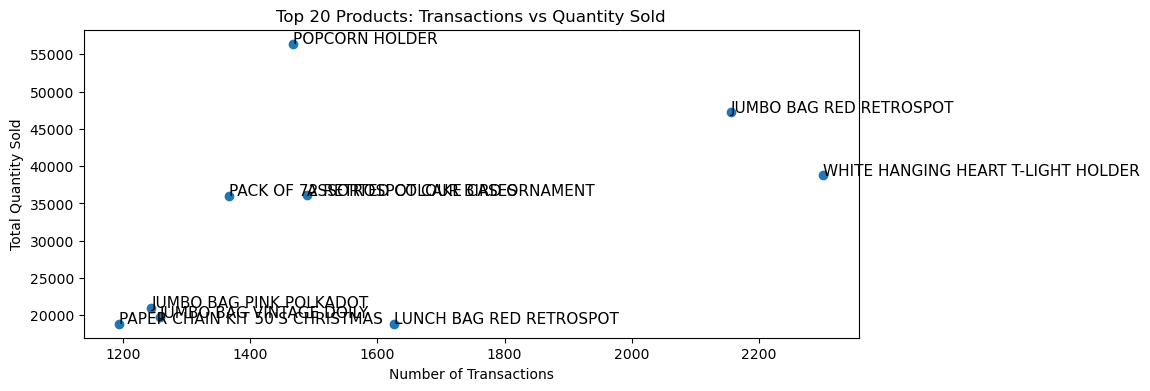

In [63]:
plt.figure(figsize=(10,4)) 
plt.scatter(comparison_df['Amount'], comparison_df['TotalQuantity']) 
for i, row in comparison_df.iterrows(): 
    plt.text(row['Amount'], row['TotalQuantity'], row['Description'], fontsize=11) 

plt.xlabel('Number of Transactions') 
plt.ylabel('Total Quantity Sold') 
plt.title('Top 20 Products: Transactions vs Quantity Sold') 
plt.show()


Based on this visual, the company need to focus on 2 main products: popcorn holders and white hanging heart t-light holders. 

Popcorn holders are the most sold product yet there is fewer than 2000 transactions meaning that the product needs to be advertised more thoroughly to increase visibility which allows the product to increase the number of transactions. 

White hanging heart t-light holders are the opposite where number of transactions surplus the amount of this item sold. This item needs to sold in bulks using promotional deals to increase the amount of this item sold. 

References: 

ulrikthygepedersen. (2022) Online Retail Dataset [dataset]. Kaggle. Available at: https://www.kaggle.com/datasets/ulrikthygepedersen/online-retail-dataset 